In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
%matplotlib inline

In [25]:
iris = load_iris()
X = iris.data
y = iris.target

In [26]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [27]:
df.target.value_counts()

target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

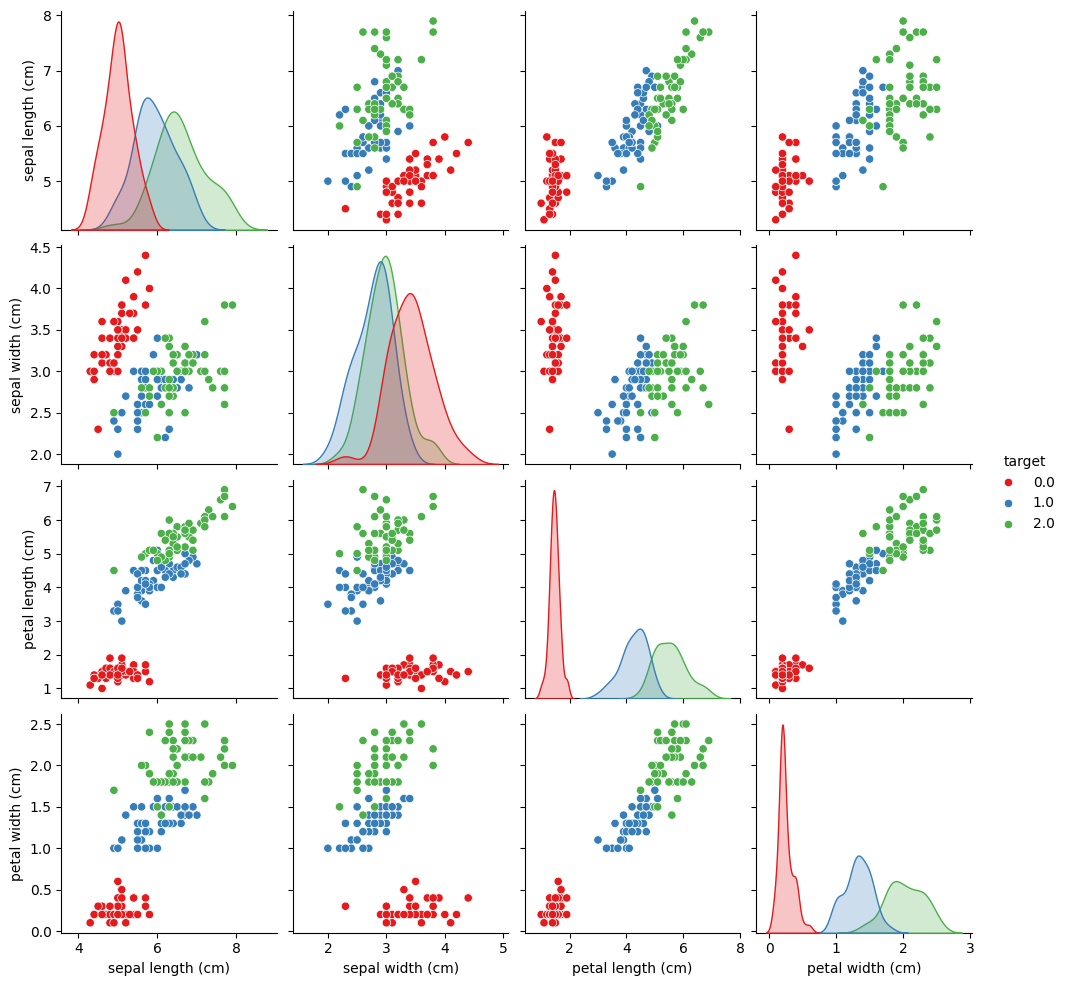

In [28]:
sns.pairplot(df, hue="target",palette="Set1")
plt.show() # for sepal length and sepal width classification is not good

In [32]:
df = df[['sepal length (cm)', 'sepal width (cm)', 'target']]
new_df = df[df.target != 0]
print(new_df.shape,df.shape)

(100, 3) (150, 3)


In [33]:
new_df.head()

,sepal length (cm),sepal width (cm),target
50,7.0,3.2,1.0
51,6.4,3.2,1.0
52,6.9,3.1,1.0
53,5.5,2.3,1.0
54,6.5,2.8,1.0


In [36]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [38]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [44]:
estimators = [('logistic', clf1), ('random_forest', clf2), ('knn', clf3)]

In [56]:
for estimator in estimators:
    cv_scores = cross_val_score(estimator[1], X, y, cv=10,scoring='accuracy')
    print(f"{estimator[0]}: {cv_scores.mean()}")

logistic: 0.8066666666666669
random_forest: 0.7133333333333334
knn: 0.76


In [57]:
from sklearn.ensemble import VotingClassifier

In [60]:
vc = VotingClassifier(estimators=estimators , voting='hard')
cross_val_score(vc, X, y, cv=10, scoring='accuracy').mean() # in this case logistic regression is dominating

np.float64(0.7733333333333333)

In [61]:
vc = VotingClassifier(estimators=estimators , voting='soft')
cross_val_score(vc, X, y, cv=10, scoring='accuracy').mean()

np.float64(0.7533333333333334)

## **weighted voting**

In [64]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            score = cross_val_score(vc, X, y, cv=10, scoring='accuracy').mean()
            print(f"Weights: {[i,j,k]} , Score: {score}")

Weights: [1, 1, 1] , Score: 0.7666666666666667
Weights: [1, 1, 2] , Score: 0.7666666666666667
Weights: [1, 1, 3] , Score: 0.76
Weights: [1, 2, 1] , Score: 0.74
Weights: [1, 2, 2] , Score: 0.76
Weights: [1, 2, 3] , Score: 0.76
Weights: [1, 3, 1] , Score: 0.72
Weights: [1, 3, 2] , Score: 0.76
Weights: [1, 3, 3] , Score: 0.7533333333333333
Weights: [2, 1, 1] , Score: 0.7733333333333333
Weights: [2, 1, 2] , Score: 0.7666666666666667
Weights: [2, 1, 3] , Score: 0.7666666666666667
Weights: [2, 2, 1] , Score: 0.7666666666666667
Weights: [2, 2, 2] , Score: 0.7666666666666667
Weights: [2, 2, 3] , Score: 0.7733333333333333
Weights: [2, 3, 1] , Score: 0.7466666666666666
Weights: [2, 3, 2] , Score: 0.76
Weights: [2, 3, 3] , Score: 0.7666666666666667
Weights: [3, 1, 1] , Score: 0.8066666666666666
Weights: [3, 1, 2] , Score: 0.78
Weights: [3, 1, 3] , Score: 0.7866666666666666
Weights: [3, 2, 1] , Score: 0.7733333333333333
Weights: [3, 2, 2] , Score: 0.76
Weights: [3, 2, 3] , Score: 0.76
Weights: [3,

In [71]:
vc = VotingClassifier(estimators=estimators, voting='soft', weights=[30,1,1])
np.round(cross_val_score(vc, X, y, cv=10, scoring='accuracy').mean() * 100 ,2)

np.float64(82.0)

In [72]:
count = 1
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            print(count,end=' ')
            print(f"Weights: {[i,j,k]}")
            count += 1

1 Weights: [1, 1, 1]
2 Weights: [1, 1, 2]
3 Weights: [1, 1, 3]
4 Weights: [1, 2, 1]
5 Weights: [1, 2, 2]
6 Weights: [1, 2, 3]
7 Weights: [1, 3, 1]
8 Weights: [1, 3, 2]
9 Weights: [1, 3, 3]
10 Weights: [2, 1, 1]
11 Weights: [2, 1, 2]
12 Weights: [2, 1, 3]
13 Weights: [2, 2, 1]
14 Weights: [2, 2, 2]
15 Weights: [2, 2, 3]
16 Weights: [2, 3, 1]
17 Weights: [2, 3, 2]
18 Weights: [2, 3, 3]
19 Weights: [3, 1, 1]
20 Weights: [3, 1, 2]
21 Weights: [3, 1, 3]
22 Weights: [3, 2, 1]
23 Weights: [3, 2, 2]
24 Weights: [3, 2, 3]
25 Weights: [3, 3, 1]
26 Weights: [3, 3, 2]
27 Weights: [3, 3, 3]


hyperparameter tuning

In [73]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)


In [74]:
svm1 = SVC(probability=True,kernel='poly',degree=1)
svm2 = SVC(probability=True,kernel='poly',degree=2)
svm3 = SVC(probability=True,kernel='poly',degree=3)
svm4 = SVC(probability=True,kernel='poly',degree=4)
svm5 = SVC(probability=True,kernel='poly',degree=5)

estimators = [('svm1', svm1), ('svm2', svm2), ('svm3', svm3), ('svm4', svm4), ('svm5', svm5)]

In [78]:
for estimator in estimators:
    cv_scores = cross_val_score(estimator[1], X, y, cv=5,scoring='accuracy')
    print(f"{estimator[0]}: {np.round(cv_scores.mean()*100,2)}")

svm1: 84.9
svm2: 85.4
svm3: 89.3
svm4: 80.1
svm5: 86.6


In [87]:
vc2 = VotingClassifier(estimators=estimators, voting='hard')
np.round(cross_val_score(vc, X, y, cv=10, scoring='accuracy').mean() * 100 ,2)

np.float64(85.5)